<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Zomato



##### **Project Type**    - Classification/Unsupervised
##### **Contribution**    - Individual
By-Iqbal Shaikh

# **Project Summary -**

To analyze zomato data of each city for customer and company

To analyze sentiment of review.

To make conclusion with visualisation.

To cluster zomato restaurant in diff segments.

To find best restaurant from analysis.

To grow bussiness and works in lagging field.

To analyse profit Vs cost.

Metadata of reviewers can be useful for identifying critics in industry

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**
**Problem Statement:**

The food delivery industry has seen exponential growth, with platforms like Zomato playing a crucial role in connecting customers with restaurants. However, understanding customer preferences, restaurant performance, and business growth opportunities remains a challenge. This study aims to analyze Zomato data from multiple cities to derive insights for both customers and businesses.

The objectives include:

**Customer Sentiment Analysis –** Evaluating customer reviews to understand satisfaction levels and areas of improvement.

**Visual Data Analysis –** Using data visualization techniques to identify trends, customer behavior, and restaurant performance.

**Restaurant Segmentation –** Clustering restaurants based on various factors such as ratings, pricing, cuisine, and customer feedback.

**Best Restaurant Identification –** Determining top-performing restaurants based on multiple parameters such as ratings, reviews, and sales.

**Business Growth Strategy –** Identifying areas where Zomato and restaurants can improve their services to enhance customer experience and increase profitability.

**Profit vs Cost Analysis –** Understanding the relationship between cost and profit to optimize restaurant pricing strategies and operational efficiency.

This study aims to leverage reviewer metadata (such as review count, rating patterns, follower count, and review sentiment) to identify influential critics in the industry.


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
# Load Dataset
rest_df=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
revi_df=pd.read_csv('/content/Zomato Restaurant reviews.csv')

In [4]:
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [5]:
revi_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

**Restaurant Metadata**

In [6]:
rest_df.head(3).style.set_properties(**{
    'border': '2px solid black',
    'color': 'darkblue',
    'background-color': 'lightblue',
    'font-weight': 'bold',
    'text-align': 'left'})

**Restaurant Reviews**

In [7]:
revi_df.head(3).style.set_properties(**{
    'border': '2px solid black',
    'color': 'darkblue',
    'background-color': 'lightblue',
    'font-weight': 'bold',
    'text-align': 'left'
})

In [8]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [9]:
revi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [10]:
rest_df.shape

(105, 6)

In [11]:
revi_df.shape

(10000, 7)

In [12]:
# Merging on the restaurant name
merged_df = pd.merge(revi_df, rest_df, left_on="Restaurant", right_on="Name", how="inner")


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [14]:
# Dataset First Look
merged_df.head(3).style.set_properties(**{
    'border': '2px solid black',
    'color': 'darkblue',
    'background-color': 'lightblue',
    'font-weight': 'bold',
    'text-align': 'left'})

### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
merged_df.shape

(10000, 13)

In [16]:
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Timings'],
      dtype='object')

### Dataset Information

In [17]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurant   10000 non-null  object
 1   Reviewer     9962 non-null   object
 2   Review       9955 non-null   object
 3   Rating       9962 non-null   object
 4   Metadata     9962 non-null   object
 5   Time         9962 non-null   object
 6   Pictures     10000 non-null  int64 
 7   Name         10000 non-null  object
 8   Links        10000 non-null  object
 9   Cost         10000 non-null  object
 10  Collections  5000 non-null   object
 11  Cuisines     10000 non-null  object
 12  Timings      9900 non-null   object
dtypes: int64(1), object(12)
memory usage: 1015.8+ KB


#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
merged_df.duplicated().sum()


36

#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
missing_value=merged_df.isnull().sum()
missing_value

Restaurant        0
Reviewer         38
Review           45
Rating           38
Metadata         38
Time             38
Pictures          0
Name              0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
dtype: int64

In [20]:
missing_value=missing_value[missing_value>0]

In [21]:
missing_value.index

Index(['Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Collections',
       'Timings'],
      dtype='object')

<ipython-input-22-a961a2bc332d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value.index, y=missing_value.values,palette='viridis')


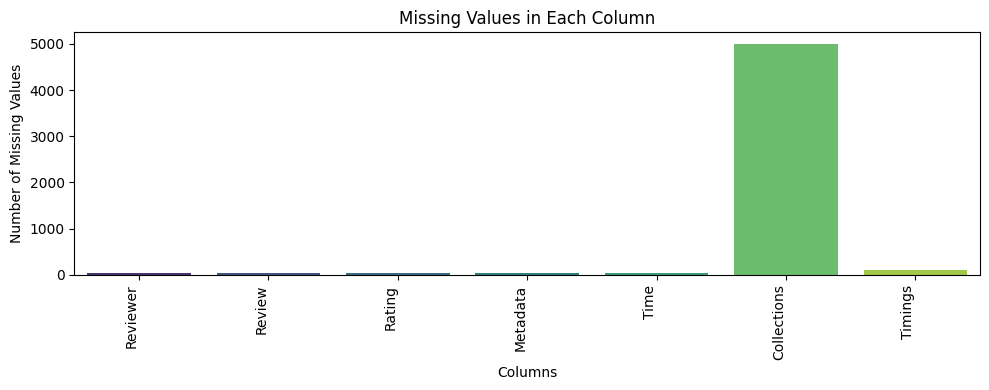

In [22]:
# Visualizing the missing values
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_value.index, y=missing_value.values,palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

After merging the restaurant name and restaurant reviews, here’s what we know so far:

**Dataset Structure**

**Total Rows:** 10,000.

**Total Columns:** 13.

**Key Columns:**'Restaurant', 'Reviewer', 'Review', 'Rating',    'Metadata', 'Time','Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines','Timings'

**Duplicates:** 36 duplicate rows.

**Missing index:** 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',

 'Collections','Timings'



## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Timings'],
      dtype='object')

In [24]:
# Dataset Describe
merged_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

### Variables Description

**Restaurant:**show name of restaurant.

**Reviewer:**name of reviewer

**Review:**giving likes and dislikes of services/food  of restaurant

**Rating:**giving star wrt personel likes/dislikes

**Metadata:**The column "metadata" contains values that represent the column names of actual data, such as 'review' and 'followers'. This suggests that the metadata column acts as a descriptor or reference to the structure of another dataset.

 **Time:**it shows time at which review done

**Pictures:**no of pictures posted with review

**Name:**show name of restaurant

**Links:**gives url link of restaurant

**Cost:**shows how much cost per person

**Collections:**tagging of restaurant wrt to zomato category

**Cuisines:**types of dishes served wrt to countries

**Timings:**openin and closing time of restaurant

### Check Unique Values for each variable.

In [25]:
for i in merged_df.columns:
  print(f'Number of unique values in {i} is {merged_df[i].nunique()}')

Number of unique values in Restaurant is 100
Number of unique values in Reviewer is 7446
Number of unique values in Review is 9364
Number of unique values in Rating is 10
Number of unique values in Metadata is 2477
Number of unique values in Time is 9782
Number of unique values in Pictures is 36
Number of unique values in Name is 100
Number of unique values in Links is 100
Number of unique values in Cost is 28
Number of unique values in Collections is 42
Number of unique values in Cuisines is 89
Number of unique values in Timings is 74


## 3. ***Data Wrangling***
Suggested Data-Wrangling Steps:
Handle Metadata Column:

Convert metadata values into structured columns if they represent actual data attributes.
Pivot or expand metadata if necessary.
Merge Datasets Properly:

Ensure rest_df and revi_df are merged correctly (e.g., using a common key like restaurant_id).
Check for missing values after merging.
Clean Column Names:

Standardize column names (remove spaces, special characters).
Convert them to lowercase for consistency.
Handle Missing Values:

Identify and address NaN values (drop, fill, or impute based on context).
Convert Data Types:

Ensure numerical columns are correctly formatted (int or float).
Convert categorical columns into appropriate formats (category or one-hot encoding if needed).
Check for Duplicates:

Remove duplicate rows if they exist.
Normalize & Scale Data (if needed):

Normalize numerical values (like ratings, follower counts) for better comparisons.

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.
# Data Issues Identified
# 1=Missing Values:
#   Reviewer, Review, Rating, Metadata, Time, and Timings have some missing values.
#   Collections has many missing values (50% missing).

# 2=Data Type Issues:
#   Rating is stored as an object (string) instead of numeric.
#   Cost contains commas and should be converted to numeric.

# 3=Metadata Extraction:
#   Metadata column contains values like "3 Reviews , 2 Followers", which should be split into:
#   Total_Reviews → Number of reviews.
#   Total_Followers → Number of followers.

**Drop name col**

In [27]:
#drop name col
merged_df = merged_df.drop(columns=["Name"])  # Drop duplicate column

**Find Columns with Spaces**

In [28]:
cols_with_spaces = [col for col in merged_df.columns if " " in col]
print(cols_with_spaces)

[]


**Normalization of string by lowercase**

In [29]:
# Standardize column names
merged_df.columns = merged_df.columns.str.lower().str.replace(" ", "_")

**Convert object to numeric dtype**

In [30]:
# Convert 'cost' column to numeric (remove commas)
merged_df["cost"] = merged_df["cost"].astype(str).str.replace(",", "").astype(float)

In [31]:
# Convert 'rating' column to numeric
merged_df["rating"] = pd.to_numeric(merged_df["rating"], errors="coerce")

**Split Metadata**

In [32]:
# Extract 'total_reviews' and 'total_followers' from 'metadata'
#merged_df["total_reviews"] = merged_df["metadata"].str.extract(r"(\d+) Reviews").astype(float)
merged_df["total_reviews"] = (merged_df["metadata"].str.extract(r"(\d+)").astype(float).fillna(0).astype(int))
#merged_df["total_followers"] = merged_df["metadata"].str.extract(r"(\d+) Followers").astype(float)
merged_df["total_followers"] = (merged_df["metadata"].str.extract(r"(\d+)").astype(float).fillna(0).astype(int))

**Drop Metadata**

In [33]:
# Drop original 'metadata' column
merged_df = merged_df.drop(columns=["metadata"])

**Here two columns added total_reviews,total_followers**

In [34]:
merged_df.isnull().sum()

restaurant            0
reviewer             38
review               45
rating               39
time                 38
pictures              0
links                 0
cost                  0
collections        5000
cuisines              0
timings             100
total_reviews         0
total_followers       0
dtype: int64

**Fill all columns**

In [35]:
# Fill missing values
merged_df["reviewer"].fillna("Unknown", inplace=True)
merged_df["review"].fillna("No review available", inplace=True)
merged_df["rating"].fillna(merged_df["rating"].median(), inplace=True)
merged_df["time"].fillna("Unknown", inplace=True)
merged_df["timings"].fillna("Unknown", inplace=True)
merged_df["collections"].fillna("None", inplace=True)
merged_df["total_reviews"].fillna(0, inplace=True)
merged_df["total_followers"].fillna(0, inplace=True)

<ipython-input-35-18d93005ac4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["reviewer"].fillna("Unknown", inplace=True)
<ipython-input-35-18d93005ac4f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant       10000 non-null  object 
 1   reviewer         10000 non-null  object 
 2   review           10000 non-null  object 
 3   rating           10000 non-null  float64
 4   time             10000 non-null  object 
 5   pictures         10000 non-null  int64  
 6   links            10000 non-null  object 
 7   cost             10000 non-null  float64
 8   collections      10000 non-null  object 
 9   cuisines         10000 non-null  object 
 10  timings          10000 non-null  object 
 11  total_reviews    10000 non-null  int64  
 12  total_followers  10000 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1015.8+ KB


**Check duplicates**

In [37]:
merged_df.duplicated().sum()

36

**Remove duplicates**

In [38]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

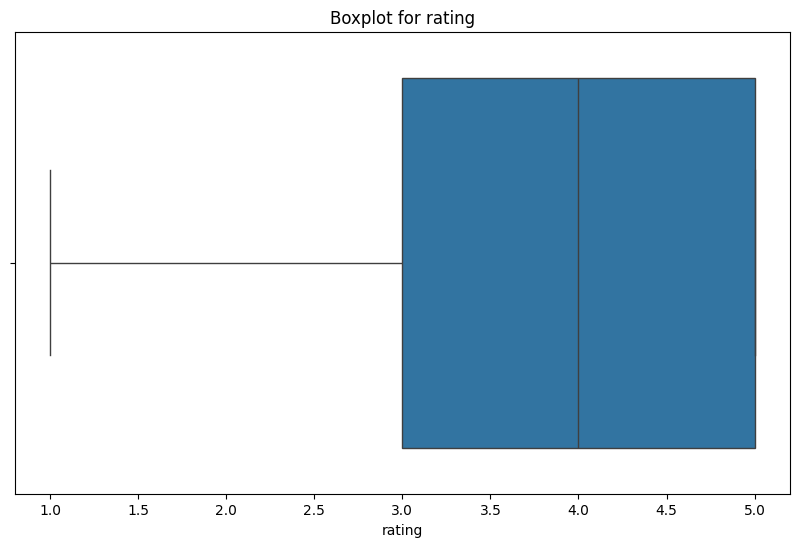

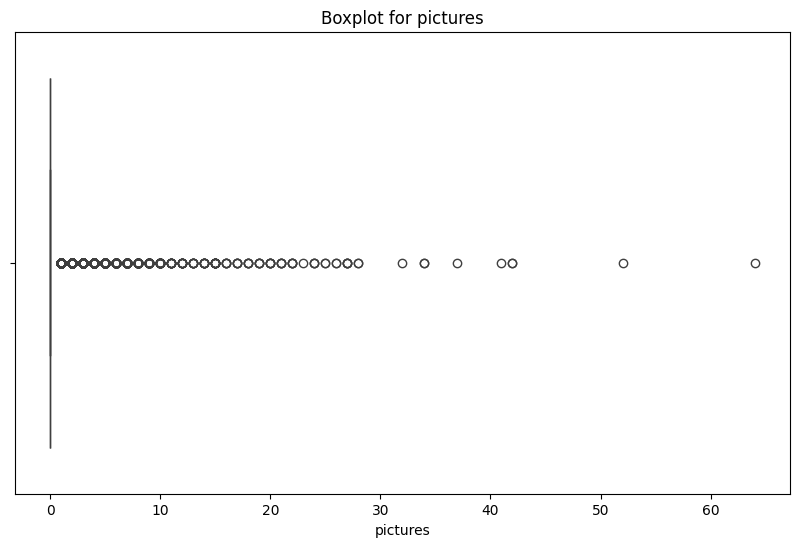

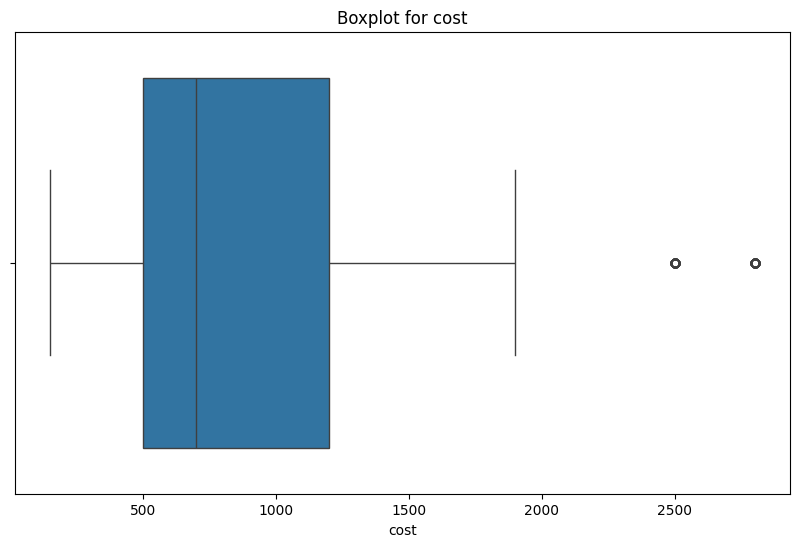

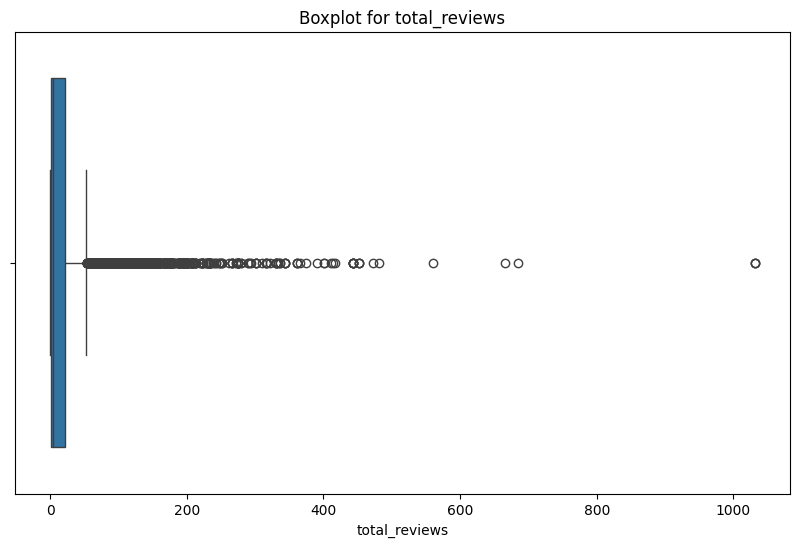

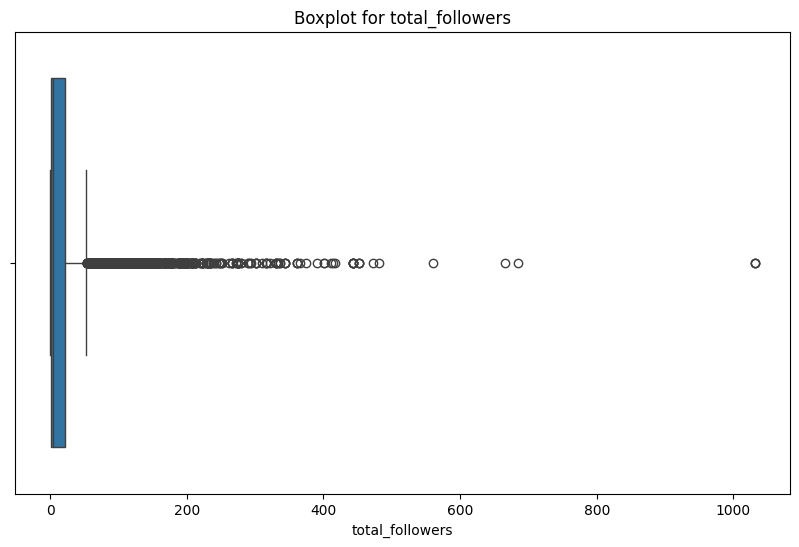

In [39]:
# Handling Outliers & Outlier treatments
numerical_features = merged_df.select_dtypes(exclude='object').columns
# Plotting boxplots to visually inspect for outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [40]:
#remove outliers
for i in numerical_features:
  if merged_df[i].dtypes!='object':
    q1=merged_df[i].quantile(0.25)
    q3=merged_df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    merged_df=merged_df[(merged_df[i]>=lb) & (merged_df[i]<=ub)]

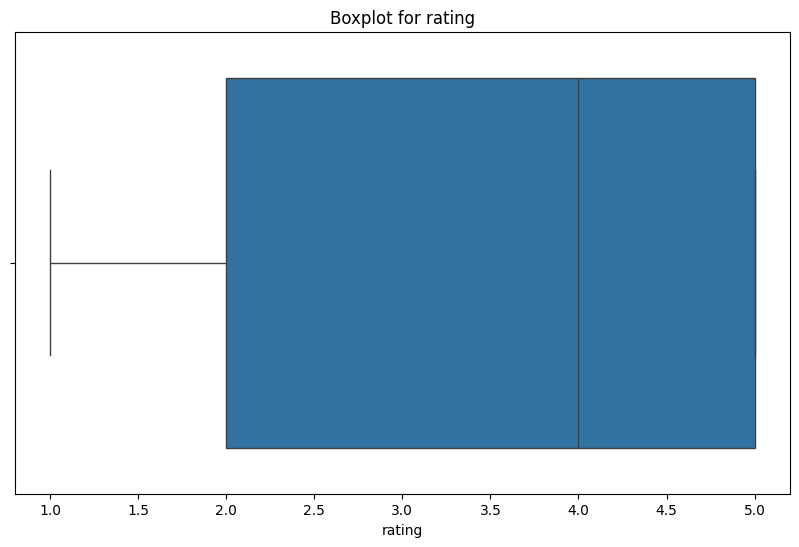

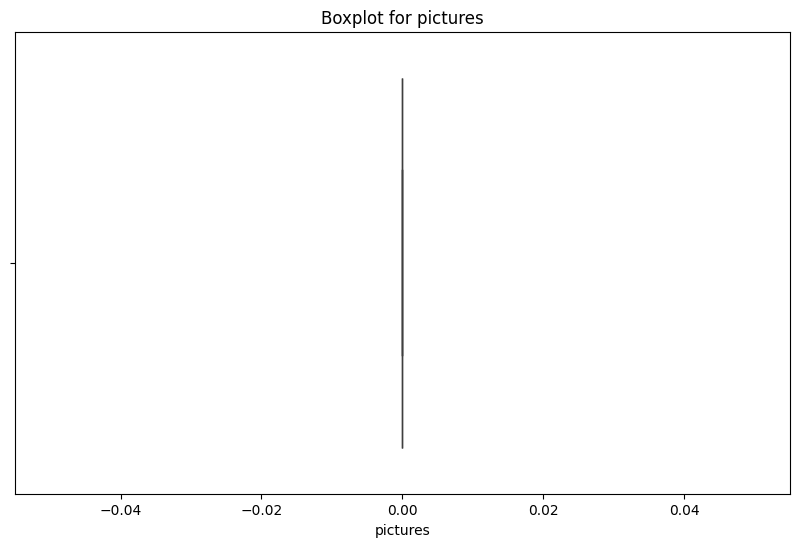

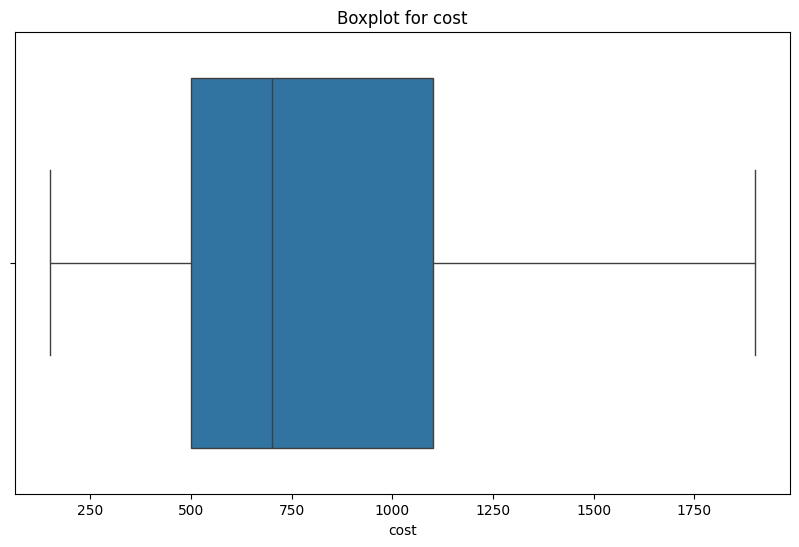

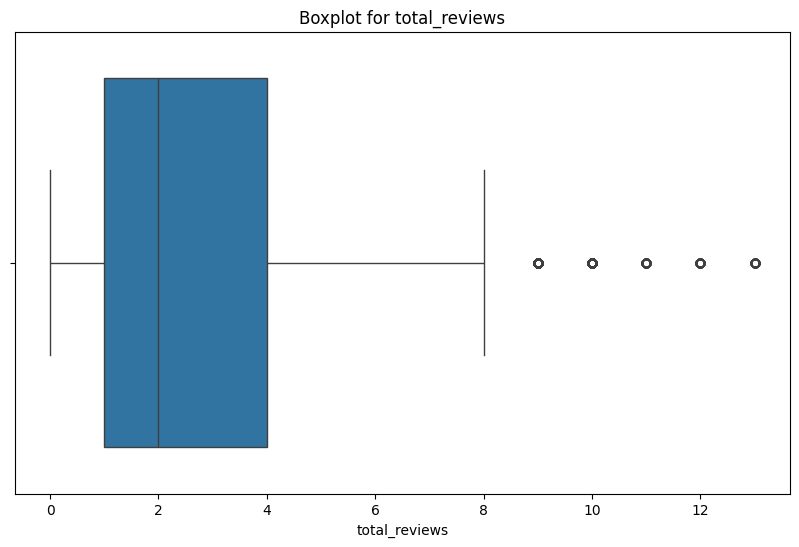

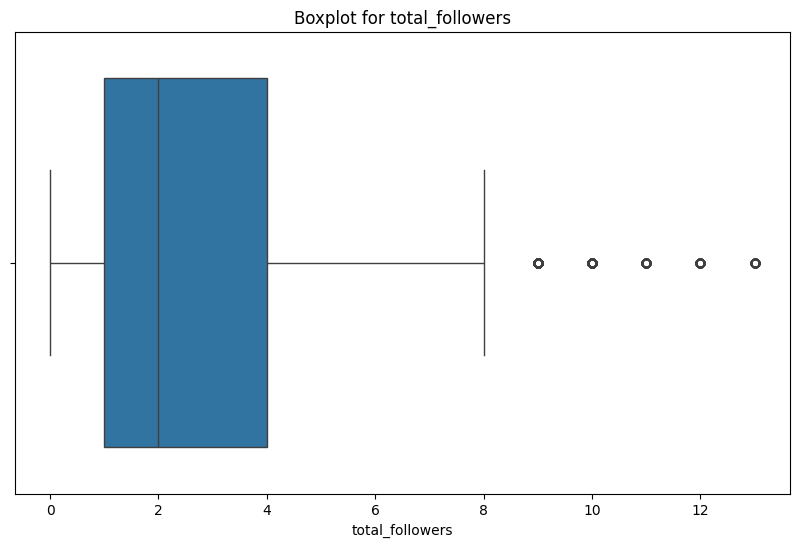

In [41]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [42]:
merged_df.shape

(6105, 13)

In [43]:
merged_df.head(2).style.set_properties(**{
    'border': '2px solid black',
    'color': 'darkblue',
    'background-color': 'lightblue',
    'font-weight': 'bold',
    'text-align': 'left'})

In [44]:
merged_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'time', 'pictures',
       'links', 'cost', 'collections', 'cuisines', 'timings', 'total_reviews',
       'total_followers'],
      dtype='object')

**before we have:**Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time','Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines','Timings'],dtype='object')

**removed**:name,metadata

**now we have:**'restaurant', 'reviewer', 'review', 'rating', 'time', 'pictures','links', 'cost', 'collections', 'cuisines', 'timings', 'total_reviews', 'total_followers'],dtype='object'

**added:**total_reviews,total_followers

### What all manipulations have you done and insights you found?

1-drop "name"and"metadata" column.

2-Check any columns have space.

3-Normalization of string by lowercase.

4-Convert object type to numeric.

5-Split Metadata.

6-fill missing values.

7-Remove duplicate rows

In [45]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.1 MB/s eta 0:00:00


In [46]:
from sklearn.cluster import KMeans#used for grouping similar data points into clusters based on feature similarity.
from textblob import TextBlob#a Python library for sentiment analysis, spelling correction, and text processing in NLP.
from wordcloud import WordCloud#used to generate word clouds for visualizing the most frequent words in text data.
from sklearn.preprocessing import StandardScaler#standardizes features by removing the mean and scaling to unit variance, making data suitable for machine learning models.
import re,string,unicodedata# re → Handles regular expressions for text cleaning.
                             #string → Provides functions for handling punctuation and string operations.
                             #unicodedata → Normalizes Unicode text (e.g., converting accented characters to standard forms.
import contractions#Expands shortened words (e.g., "don't" → "do not").
from bs4 import BeautifulSoup#used for web scraping and parsing HTML/XML documents to extract or clean text data.
import numpy as np
import pandas as pd
import nltk#used for text processing, tokenization, stopword removal, stemming, lemmatization, and NLP tasks
nltk.download('stopwords')#downloads common words (e.g., the, is, and) to remove them from text during NLP tasks like sentiment analysis and text preprocessing.
nltk.download('punkt')# Punkt tokenizer, which is used for splitting text into sentences and words in Natural Language Processing (NLP)
nltk.download('wordnet')#downloads WordNet, a lexical database used for lemmatization, which converts words to their base form (e.g., running → run).
from nltk.corpus import stopwords# imports a list of common words (e.g., the, is, at) that are usually removed in NLP tasks to improve text analysis
from nltk.tokenize import word_tokenize,sent_tokenize#imports functions for text tokenization:word_tokenize → Splits text into words.sent_tokenize → Splits text into sentences
from nltk.stem.wordnet import WordNetLemmatizer#imports WordNetLemmatizer, which reduces words to their base form (e.g., running → run) using WordNet’s lexical database
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


• Contractions: Used to expand contractions in text (e.g., "can't" to "cannot").

• re, string, unicodedata: For regular expressions, string operations, and handling Unicode data.

• BeautifulSoup: A library for parsing HTML content, which may be used to clean up tweet text.

• NumPy and Pandas: Fundamental libraries for numerical computations and data manipulation.

NLTK (Natural Language Toolkit): A comprehensive library for working with human language data (text). Here, it is used for downloading stopwords, tokenizing words and sentences, and lemmatizing (reducing words to their base form).!

In [47]:
merged_df.head(1)

restaurant           reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              review  rating             time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   

   pictures                                              links   cost  \
0         0  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                         collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         timings  total_reviews  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

   total_followers  
0                1

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6105 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant       6105 non-null   object 
 1   reviewer         6105 non-null   object 
 2   review           6105 non-null   object 
 3   rating           6105 non-null   float64
 4   time             6105 non-null   object 
 5   pictures         6105 non-null   int64  
 6   links            6105 non-null   object 
 7   cost             6105 non-null   float64
 8   collections      6105 non-null   object 
 9   cuisines         6105 non-null   object 
 10  timings          6105 non-null   object 
 11  total_reviews    6105 non-null   int64  
 12  total_followers  6105 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 667.7+ KB


percentage of review for each restaurant

<ipython-input-49-5ad2380530cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='restaurant', y='total_reviews', estimator=sum, palette='Paired')


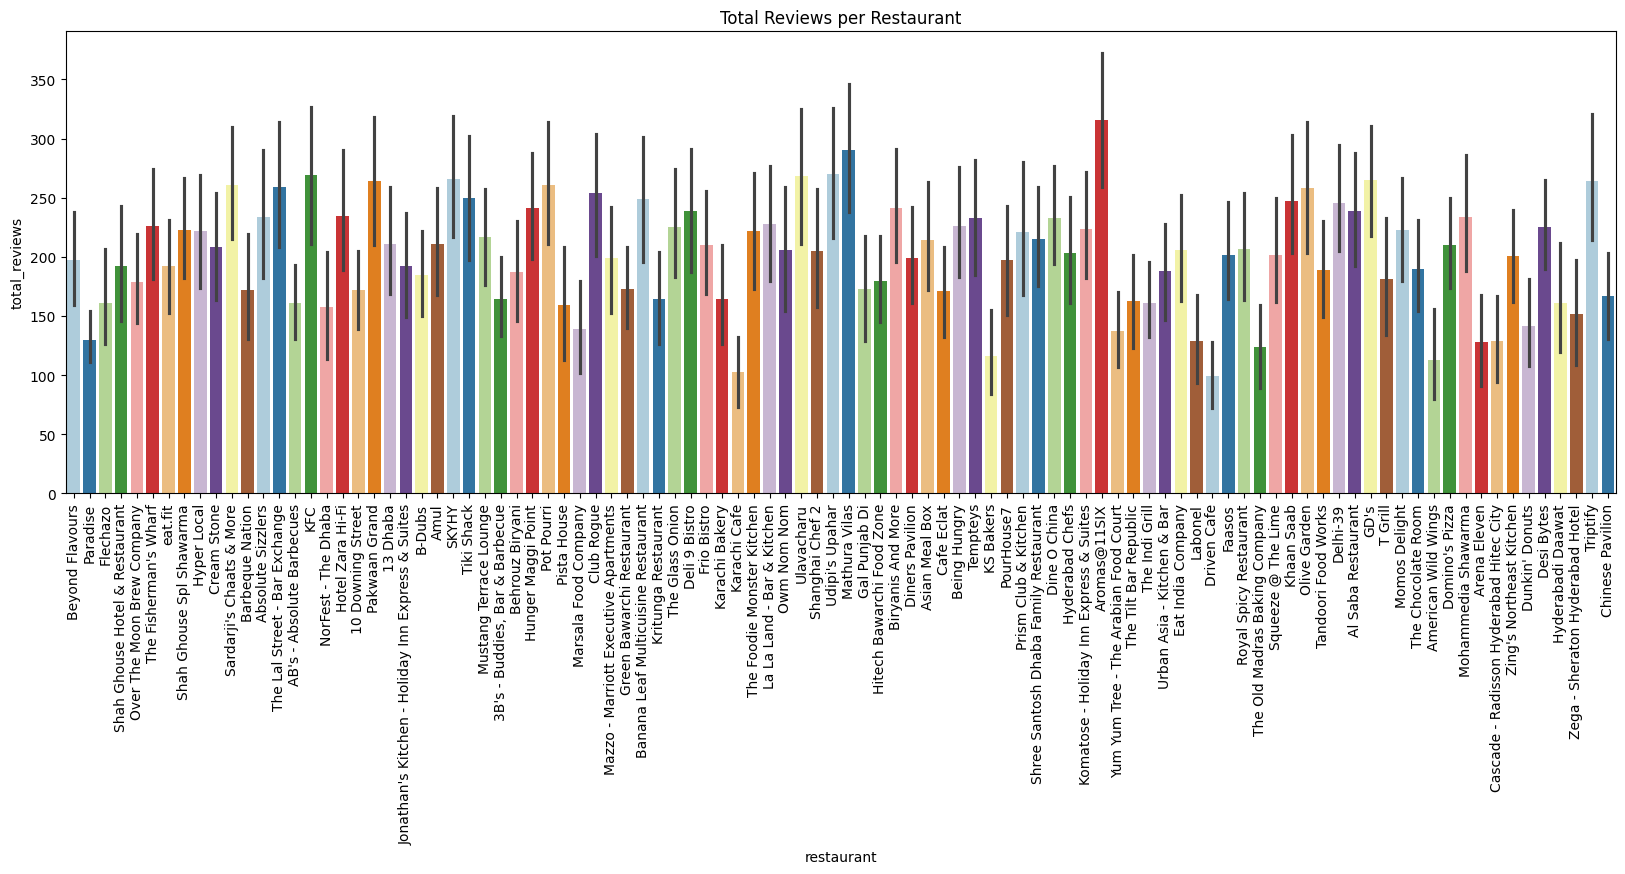

In [49]:
plt.figure(figsize=(20, 6))
sns.barplot(data=merged_df, x='restaurant', y='total_reviews', estimator=sum, palette='Paired')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Total Reviews per Restaurant")
plt.show()
#The small sticks on each bar are error bars, which seaborn.barplot includes by default to show confidence intervals.
# Component Breakdown:
# sns.barplot(...) → Creates a bar chart using Seaborn.
# data=merged_df → Uses the merged_df DataFrame as the data source.
# x='restaurant' → Sets the x-axis to the 'restaurant' column (categorical variable).
# y='total_reviews' → Sets the y-axis to the 'total_reviews' column (numerical variable).
# estimator=sum → Aggregates total_reviews by summing values for each restaurant (useful if restaurants have duplicate rows).
# palette='Paired' → Uses the Paired color palette for better visual distinction between bars.

**Perform text preprocessing on the Review column (removing punctuation, stopwords, and lemmatization).**

**Use textblob for Sentiment Analysis**

In [50]:
from textblob import TextBlob
#Objective 1:Sentiment Analysis
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply function to Review column
merged_df['Sentiment'] = merged_df['review'].apply(get_sentiment)

# Categorize sentiment
merged_df['Sentiment_Category'] = merged_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


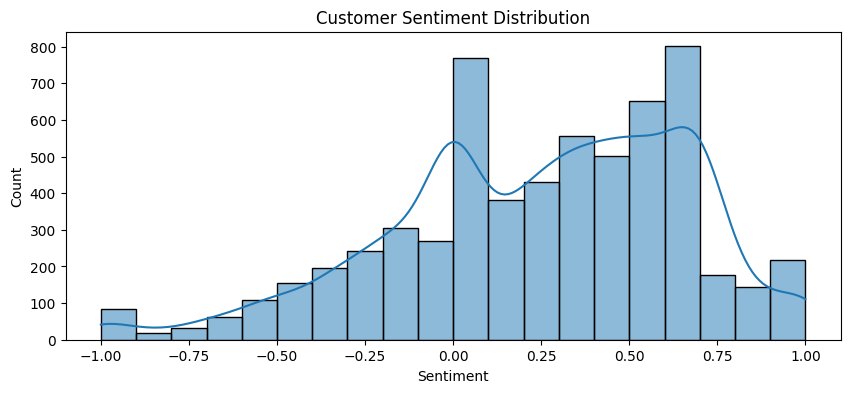

In [51]:
# Objective 2: Visual Data Analysis
plt.figure(figsize=(10, 4))
sns.histplot(merged_df['Sentiment'], bins=20, kde=True)
plt.title("Customer Sentiment Distribution")
plt.show()

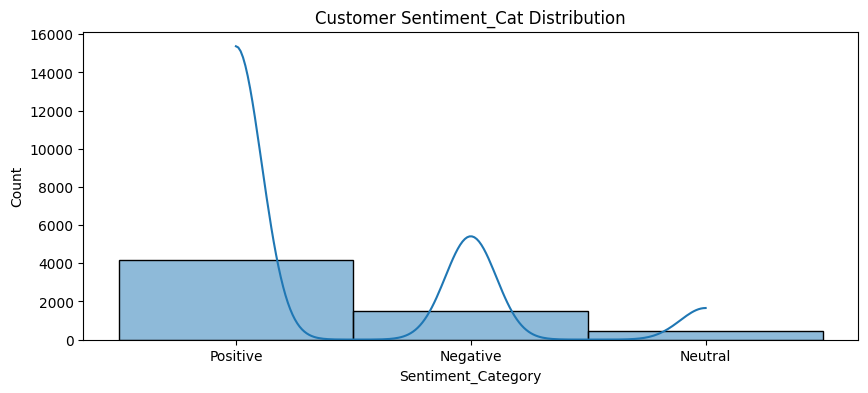

In [52]:
# Objective 2: Visual Data Analysis
plt.figure(figsize=(10, 4))
sns.histplot(merged_df['Sentiment_Category'], bins=20, kde=True)
plt.title("Customer Sentiment_Cat Distribution")
plt.show()

<ipython-input-53-b73f60bbe4d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


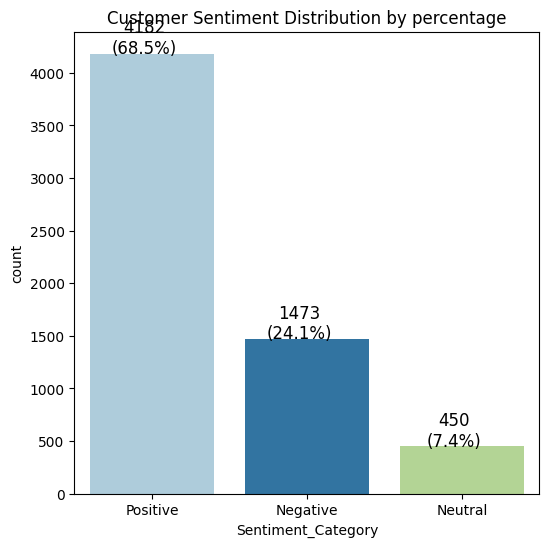

In [53]:

# Assuming 'merged_df' is your DataFrame and 'sentiment_category' is your column of interest
plt.subplots(figsize=(6, 6))

# Plot the countplot
ax = sns.countplot(
    data=merged_df,
    x='Sentiment_Category',
    palette='Paired'
)

# Calculate total count for percentage calculation
total = len(merged_df)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot
plt.title('Customer Sentiment Distribution by percentage')
plt.show()

In [54]:
merged_df.head(1)

restaurant           reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              review  rating             time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   

   pictures                                              links   cost  \
0         0  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                         collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         timings  total_reviews  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

   total_followers  Sentiment Sentiment_Category  
0                1       0.66           Positive

In [55]:
merged_df['Sentiment_Category'].value_counts()

Sentiment_Category
Positive    4182
Negative    1473
Neutral      450
Name: count, dtype: int64

**OR-Use VADER for Sentiment Analysis**

In [56]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


In [57]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# import pandas as pd

# # Initialize VADER
# analyzer = SentimentIntensityAnalyzer()

# # Function to get sentiment
# def get_vader_sentiment(text):
#     if pd.isna(text) or text.strip() == '':
#         return 0  # Neutral for missing reviews
#     return analyzer.polarity_scores(text)['compound']

# # Apply sentiment analysis
# merged_df['Sentiment_Score'] = merged_df['review'].apply(get_vader_sentiment)

# # Categorizing sentiment
# merged_df['Sentiment_Category'] = merged_df['Sentiment_Score'].apply(
#     lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
# )

# # Display sentiment distribution
# merged_df['Sentiment_Category'].value_counts()

**# Objective 3: Restaurant Segmentation**

** Label Encoding:Cuisines Column**

In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode 'cuisines' as numbers
label_encoder = LabelEncoder()
merged_df['cuisines_encoded'] = label_encoder.fit_transform(merged_df['cuisines'])

In [59]:
# Objective 3: Restaurant Segmentation
# Restaurant Segmentation
# Uses KMeans clustering with rating,cost,cluster, which is appropriate
features = merged_df[['rating', 'cost','cuisines_encoded']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(features)#create "cluster"column
#check cluster assignment
print(merged_df[['rating', 'cost', 'Cluster']].head())

   rating   cost  Cluster
0     5.0  800.0        0
1     5.0  800.0        0
2     5.0  800.0        0
3     5.0  800.0        0
4     5.0  800.0        0


**Suggested Performance Evaluation**
**To measure clustering effectiveness, you can:**
**Inertia (Sum of Squared Errors - SSE) **

In [60]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 159480842.4802102


**Silhouette Score**

In [61]:
from sklearn.metrics import silhouette_score
score = silhouette_score(features, merged_df['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5509383069827406


**Cross validation & Hyper Tuning**

In [62]:
#No, cross-validation is not needed for K-Means clustering because it is an unsupervised learning algorithm that does not rely on labeled training and test data.

**Alternative Approach for Model Validation**
**Instead of cross-validation, you can test the stability of clustering by **running K-Means multiple times with different random_state values and and comparing the Silhouette Score across runs  checking if the cluster assignments remain consistent.

In [63]:
# Steps to Check Stability
# Run K-Means multiple times with different random seeds.
# Compute the Silhouette Score for each run.
# Analyze how much the scores vary
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define the number of runs for stability check
num_runs = 5
random_states = np.random.randint(0, 100, size=num_runs)

silhouette_scores = []

for state in random_states:
    kmeans = KMeans(n_clusters=3, random_state=state, n_init=10)
    clusters = kmeans.fit_predict(features)
    score = silhouette_score(features, clusters)
    silhouette_scores.append((state, score))

# Display results
print("Silhouette Scores for Different Runs:")
for state, score in silhouette_scores:
    print(f"Random State {state}: Silhouette Score = {score:.4f}")

# Check Variability
score_variability = np.std([s[1] for s in silhouette_scores])
print(f"\nSilhouette Score Variability: {score_variability:.4f}")

Silhouette Scores for Different Runs:
Random State 31: Silhouette Score = 0.5623
Random State 65: Silhouette Score = 0.5623
Random State 0: Silhouette Score = 0.5623
Random State 55: Silhouette Score = 0.5623
Random State 84: Silhouette Score = 0.5623

Silhouette Score Variability: 0.0000


Hyperparameter Tuning in K-Means
Unlike supervised learning models, K-Means has limited hyperparameters to tune. However, the following key parameters can be optimized for better clustering results.

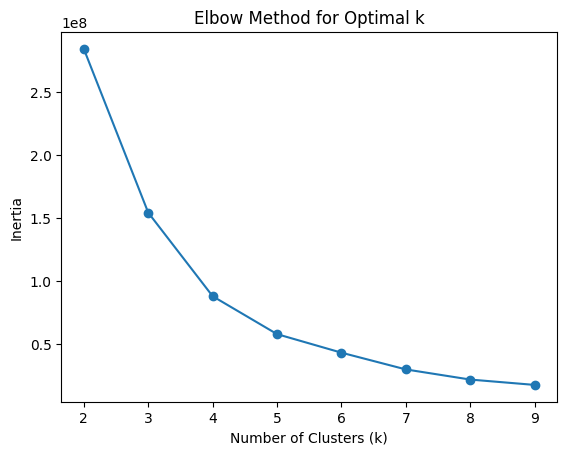

In [64]:
# 1. Optimal Number of Clusters (n_clusters)
# Why? Choosing the right number of clusters is crucial for meaningful segmentation.

# Methods to find the best k:
# Elbow Method (Using Inertia)
import matplotlib.pyplot as plt
inertia_scores = []
K_values = range(2, 10)  # Try different values of k

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia_scores.append(kmeans.inertia_)

plt.plot(K_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [65]:
merged_df[ 'Cluster'].value_counts()

Cluster
2    2271
0    2178
1    1656
Name: count, dtype: int64

**# Objective 4: Best Restaurant Identification**(ratings, reviews, and sales)

In [66]:
best_restaurants = merged_df.sort_values(['rating','review'], ascending=False).head(10)
print("Top 10 Restaurants:\n", best_restaurants[['restaurant', 'rating']])

Top 10 Restaurants:
                            restaurant  rating
4582                      Owm Nom Nom     5.0
1583                              KFC     5.0
4573                      Owm Nom Nom     5.0
6659                     Aromas@11SIX     5.0
9747  Zega - Sheraton Hyderabad Hotel     5.0
9765  Zega - Sheraton Hyderabad Hotel     5.0
1776                 Hotel Zara Hi-Fi     5.0
9519                       Desi Bytes     5.0
7417                           Faasos     5.0
1596                              KFC     5.0


**# Objective 5: Business Growth Strategy (Example: Most Common Review Words)**

**Let us start with word cloud for negative tweets**

In [67]:
# Business Growth Strategy
# Word cloud effectively captures common words in reviews.
from wordcloud import WordCloud,STOPWORDS
neg_df = merged_df[merged_df['Sentiment_Category']=='Negative'] #filtered for negative sentiment tweets
words = ' '.join(neg_df['review'])
#combines all the tweets (text column) into a single string, where each tweet is separated by space

In [68]:
words

'We ordered corn cheese balls, manchow soup and paneer shashlik sizzler. The sizzler was stale. Paneer was smelling and the waiter was so impolite to even accept the mistake. Never going again we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. We’ve requested them multiple times but its of no use. Please don’t waste your money and I strictly recommend not to prefer beyond flavours, I have been at this place for dinner a few days back. The ambience was good. The restaurant was almost half occupied. We immediately got a table. But then waited for 10 mins to get water and menu, that too after a few reminders. We ordered a few starters, main course items and mock drinks. Only the starters could be served in 30 mins. There was no sign of mock drinks! We noticed similar service issues on other tables. Noticed guests literally shouting on the staff.\n\nThe food was just average. Dishes were not prepared well, at least when com

In [69]:
neg_df.shape

(1473, 17)

In [70]:
neg_df.head(1)

restaurant       reviewer  \
14  Beyond Flavours  Kankaria.ritu   

                                               review  rating  \
14  We ordered corn cheese balls, manchow soup and...     1.0   

               time  pictures  \
14  5/22/2019 21:19         0   

                                                links   cost  \
14  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                          collections  \
14  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                             cuisines  \
14  Chinese, Continental, Kebab, European, South I...   

                                          timings  total_reviews  \
14  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

    total_followers  Sentiment Sentiment_Category  cuisines_encoded  Cluster  
14                1       -0.5           Negative                32        0

In [71]:
print(merged_df.groupby('Sentiment_Category')['review'].count())

Sentiment_Category
Negative    1473
Neutral      450
Positive    4182
Name: review, dtype: int64


**Cleaning the combined string**

In [72]:
cleaned_text_neg= " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word   #filters out any words that contain `http`
                        and not word.startswith('@') #or start with @ and
                        and word !='RT' # retweets
                        ])

In [73]:
cleaned_text_neg

'We ordered corn cheese balls, manchow soup and paneer shashlik sizzler. The sizzler was stale. Paneer was smelling and the waiter was so impolite to even accept the mistake. Never going again we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. We’ve requested them multiple times but its of no use. Please don’t waste your money and I strictly recommend not to prefer beyond flavours, I have been at this place for dinner a few days back. The ambience was good. The restaurant was almost half occupied. We immediately got a table. But then waited for 10 mins to get water and menu, that too after a few reminders. We ordered a few starters, main course items and mock drinks. Only the starters could be served in 30 mins. There was no sign of mock drinks! We noticed similar service issues on other tables. Noticed guests literally shouting on the staff. The food was just average. Dishes were not prepared well, at least when compar

**Generate a word cloud **

In [74]:
wordcloud = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='black',# Sets the background color to black
                      width=3000,# Width of the generated image
                      height=2500# Height of the generated image
                     ).generate(cleaned_text_neg)## Generates the word cloud from 'cleaned_text'

In [75]:
wordcloud

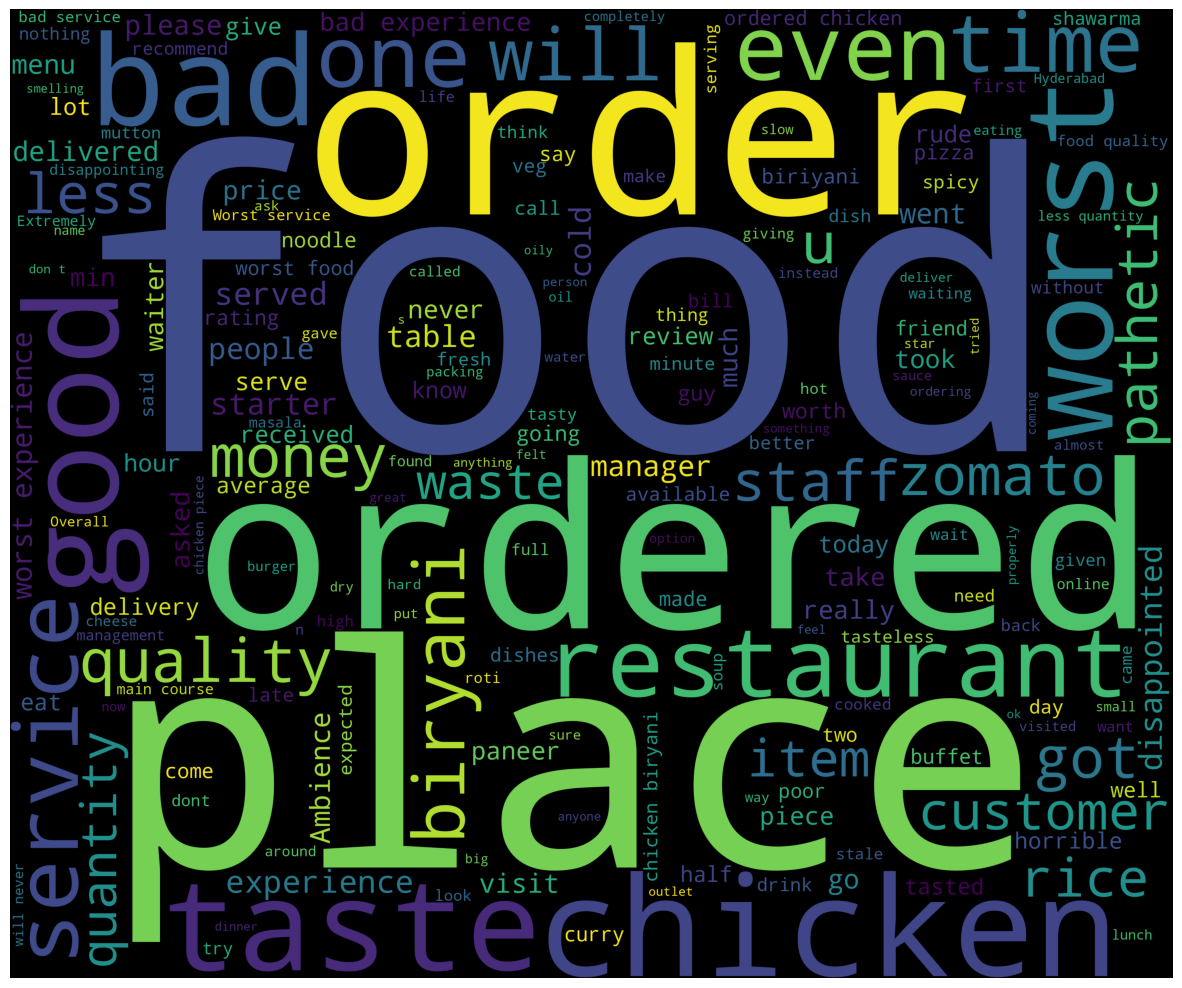

In [76]:
plt.subplots(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

** Let us start with `word cloud` for `positive tweets`**

In [77]:
pos_df = merged_df[merged_df['Sentiment_Category']=='Positive'] #filtered for positive sentiment tweets
words = ' '.join(pos_df['review'])
#combines all the tweets (text column) into a single string, where each tweet is separated by space

In [78]:
words

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful. Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing. Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again. Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good. Ambiance is good, service is good, food is aPradeecp and subro best service\nFood is good. Papiya good hostess and ur caption ver

**Cleaning the combined string**

In [79]:
cleaned_text_pos = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word   #filters out any words that contain `http`
                        and not word.startswith('@') #or start with @ and
                        and word !='RT' # retweets
                        ])

In [80]:
cleaned_text_pos

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective . Good place for a sate brunch. One can also chill with friends and or parents. Waiter Soumen Das was really courteous and helpful. Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing. Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again. Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good. Ambiance is good, service is good, food is aPradeecp and subro best service Food is good. Papiya good hostess and ur caption very g

**Generate a word cloud**

In [81]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='white',# Sets the background color to black
                      width=3000,# Width of the generated image
                      height=2500# Height of the generated image
                     ).generate(cleaned_text_pos)## Generates the word cloud from 'cleaned_text'

In [82]:
wordcloud2

** Benefits of Using WordCloud**

**1Quickly Understand Text Dat**a
Highlights the most frequent words by displaying them in larger fonts.
Helps in topic modeling for large datasets (e.g., customer reviews, tweets).

**2️Sentiment Analysis & Opinion Mining**
Useful in analyzing positive, negative, or neutral sentiments in reviews or social media comments.
Example: If "delicious" and "friendly" appear frequently, it suggests positive feedback.

**3️Exploratory Data Analysis (EDA)**
Helps explore trends in text-heavy datasets.
Example: In restaurant reviews, seeing "spicy" and "flavorful" often could indicate customer preferences.

**4️Helps in Feature Engineering**
Can assist in selecting important words for NLP tasks.
Example: In sentiment classification, high-frequency words may be useful as features.


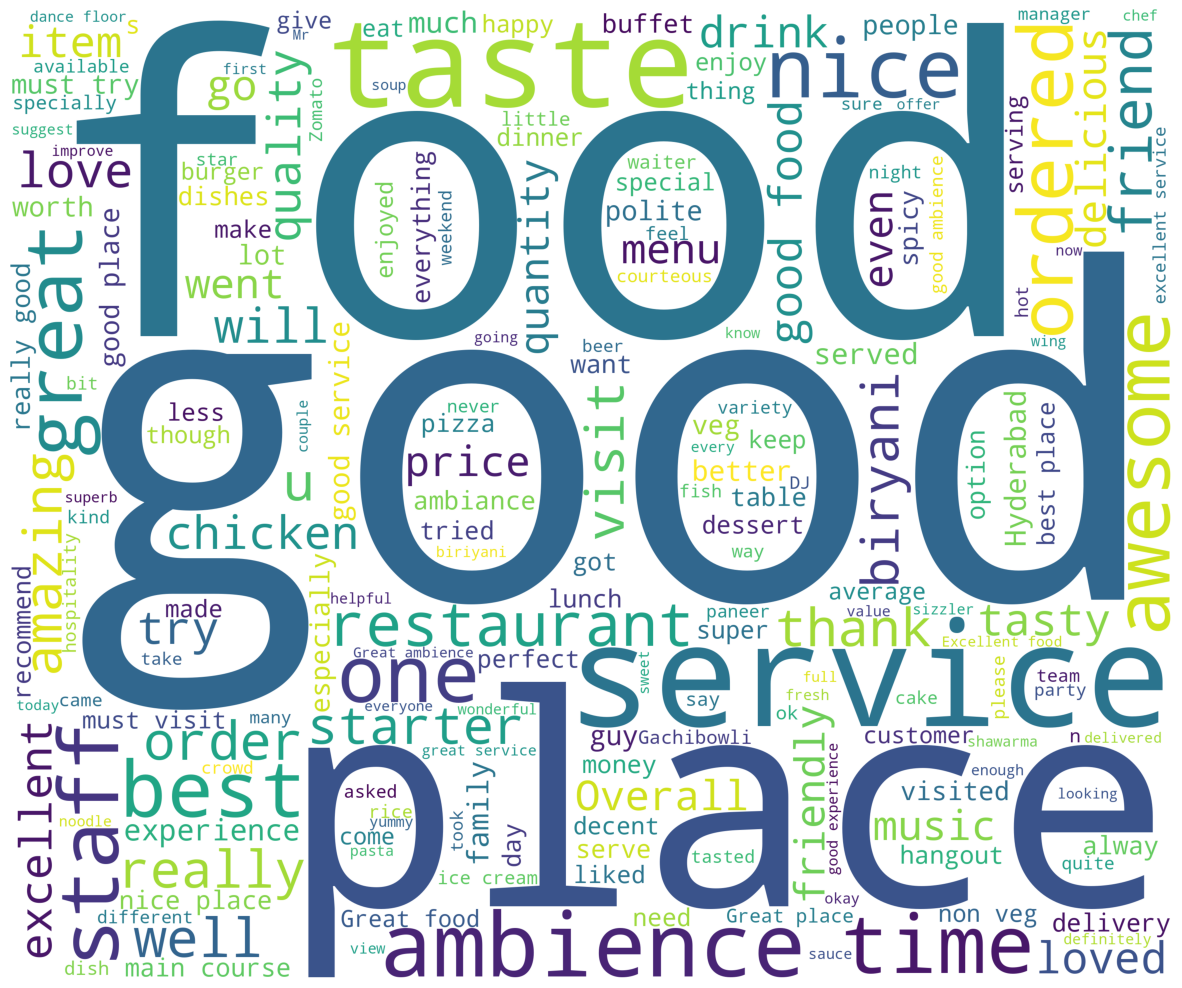

In [83]:
plt.subplots(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

**# Objective 6: Profit vs Cost Analysis**

In [84]:
merged_df.head(1)

restaurant           reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              review  rating             time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   

   pictures                                              links   cost  \
0         0  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                         collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         timings  total_reviews  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

   total_followers  Sentiment Sentiment_Category  cuisines_encoded  Cluster  
0                1       0.66           Positive                32        0

In [85]:
merged_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'time', 'pictures',
       'links', 'cost', 'collections', 'cuisines', 'timings', 'total_reviews',
       'total_followers', 'Sentiment', 'Sentiment_Category',
       'cuisines_encoded', 'Cluster'],
      dtype='object')

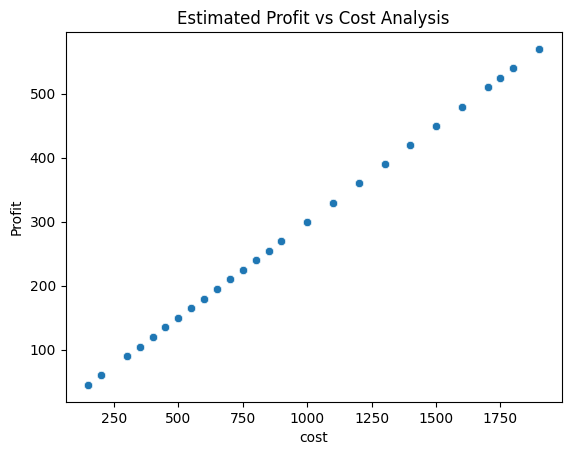

In [86]:
# Estimate Profit Using an Assumption bcoz we dont have profit column
profit_margin = 0.3  # Assume 30% profit margin
merged_df['Profit'] = merged_df['cost'] * profit_margin

sns.scatterplot(data=merged_df, x='cost', y='Profit')
plt.title("Estimated Profit vs Cost Analysis")
plt.show()

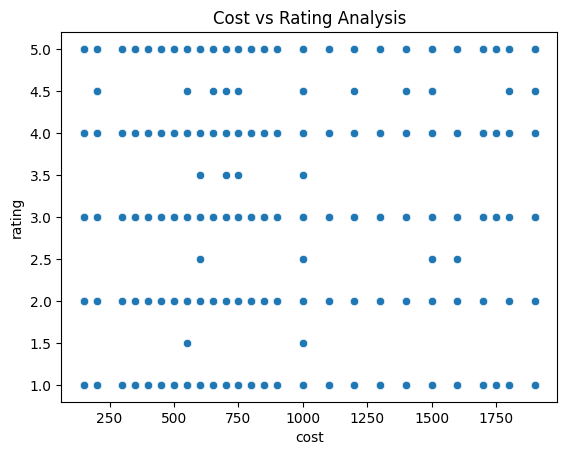

In [87]:
# Since you don't have profit or revenue, another approach is to analyze the relationship between cost and rating, assuming that
#  higher-rated restaurants might be more profitable.
sns.scatterplot(data=merged_df, x='cost', y='rating')
plt.title("Cost vs Rating Analysis")
plt.show()

**Objective : 7 Identifying Influential Critics**

In [88]:
merged_df.head(1)

restaurant           reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              review  rating             time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   

   pictures                                              links   cost  \
0         0  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                         collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         timings  total_reviews  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

   total_followers  Sentiment Sentiment_Category  cuisines_encoded  Cluster  \
0                1       0.66           Positive                32        0   

   Profit  
0   240.0

In [89]:
# Influential Critics Identification
# Influence is calculated based on review count, sentiment, and follower count.
# Potential issue: Some of these values may contain NaNs.
# Suggested Fix: Use .fillna(0) to avoid calculation errors.
merged_df['Reviewer_Influence'] = merged_df['total_reviews'] * merged_df['Sentiment'] * merged_df['total_followers']
influential_critics = merged_df.sort_values(by='Reviewer_Influence', ascending=False).head(10)
print("Top 10 Influential Critics:\n", influential_critics[['reviewer', 'Reviewer_Influence']])

Top 10 Influential Critics:
                       reviewer  Reviewer_Influence
6660                Raj Sekhar             144.000
8099         Apoorv Srivastava             144.000
5795    Mhicaela Martin Galang             135.200
272   Ketki Shrivastava Bhagat             134.355
1196                      Teju             123.840
787           Srikanth Kanduri             121.000
4578       Sudhakar Babu Gadam             118.300
6481            Radhika Mamidi             118.300
5777    Mhicaela Martin Galang             118.300
4571       Sudhakar Babu Gadam             118.300


In [90]:
influential_critics.head(1)

restaurant    reviewer  \
6660  Aromas@11SIX  Raj Sekhar   

                                                 review  rating  \
6660  I ordered Subz Biryani, Paneer Butter Masala. ...     4.0   

                 time  pictures  \
6660  8/21/2018 22:04         0   

                                                  links   cost collections  \
6660  https://www.zomato.com/hyderabad/aromas11six-g...  750.0        None   

                                     cuisines                  timings  \
6660  North Indian, Chinese, Mughlai, Biryani  11:30 AM to 12 Midnight   

      total_reviews  total_followers  Sentiment Sentiment_Category  \
6660             12               12        1.0           Positive   

      cuisines_encoded  Cluster  Profit  Reviewer_Influence  
6660                68        0   225.0               144.0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**bar chart showing the top 10 most reviewed restaurants. **​

In [91]:
merged_df.head(1)

restaurant           reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              review  rating             time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   

   pictures                                              links   cost  \
0         0  https://www.zomato.com/hyderabad/beyond-flavou...  800.0   

                                         collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         timings  total_reviews  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              1   

   total_followers  Sentiment Sentiment_Category  cuisines_encoded  Cluster  \
0                1       0.66           Positive                32        0   

   Profit  Reviewer_Influence  
0   240.0                0.66

In [92]:
top_reviewed = merged_df["restaurant"].value_counts().nlargest(10)
top_reviewed

restaurant
Hitech Bawarchi Food Zone                94
Domino's Pizza                           94
Mohammedia Shawarma                      93
Paradise                                 93
Shree Santosh Dhaba Family Restaurant    93
Hyderabad Chefs                          92
AB's - Absolute Barbecues                91
3B's - Buddies, Bar & Barbecue           91
Kritunga Restaurant                      91
Delhi-39                                 91
Name: count, dtype: int64

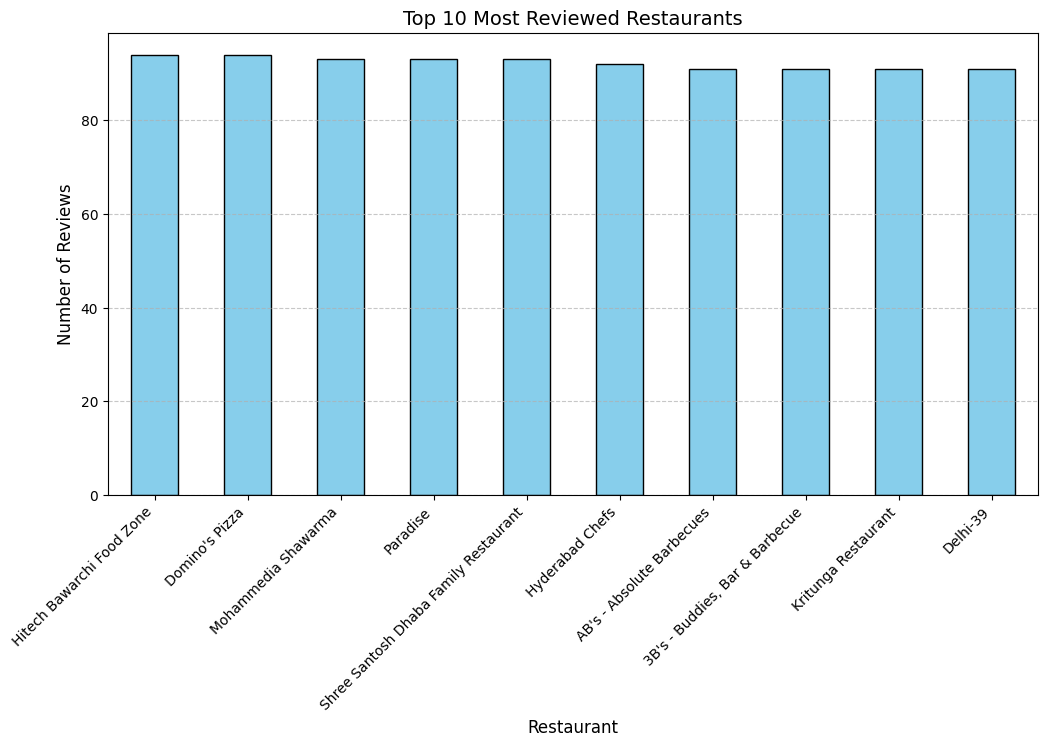

In [93]:
plt.figure(figsize=(12, 6))
top_reviewed.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Restaurant", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Top 10 Most Reviewed Restaurants", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Chart - 1-barplot restaurant vs cost

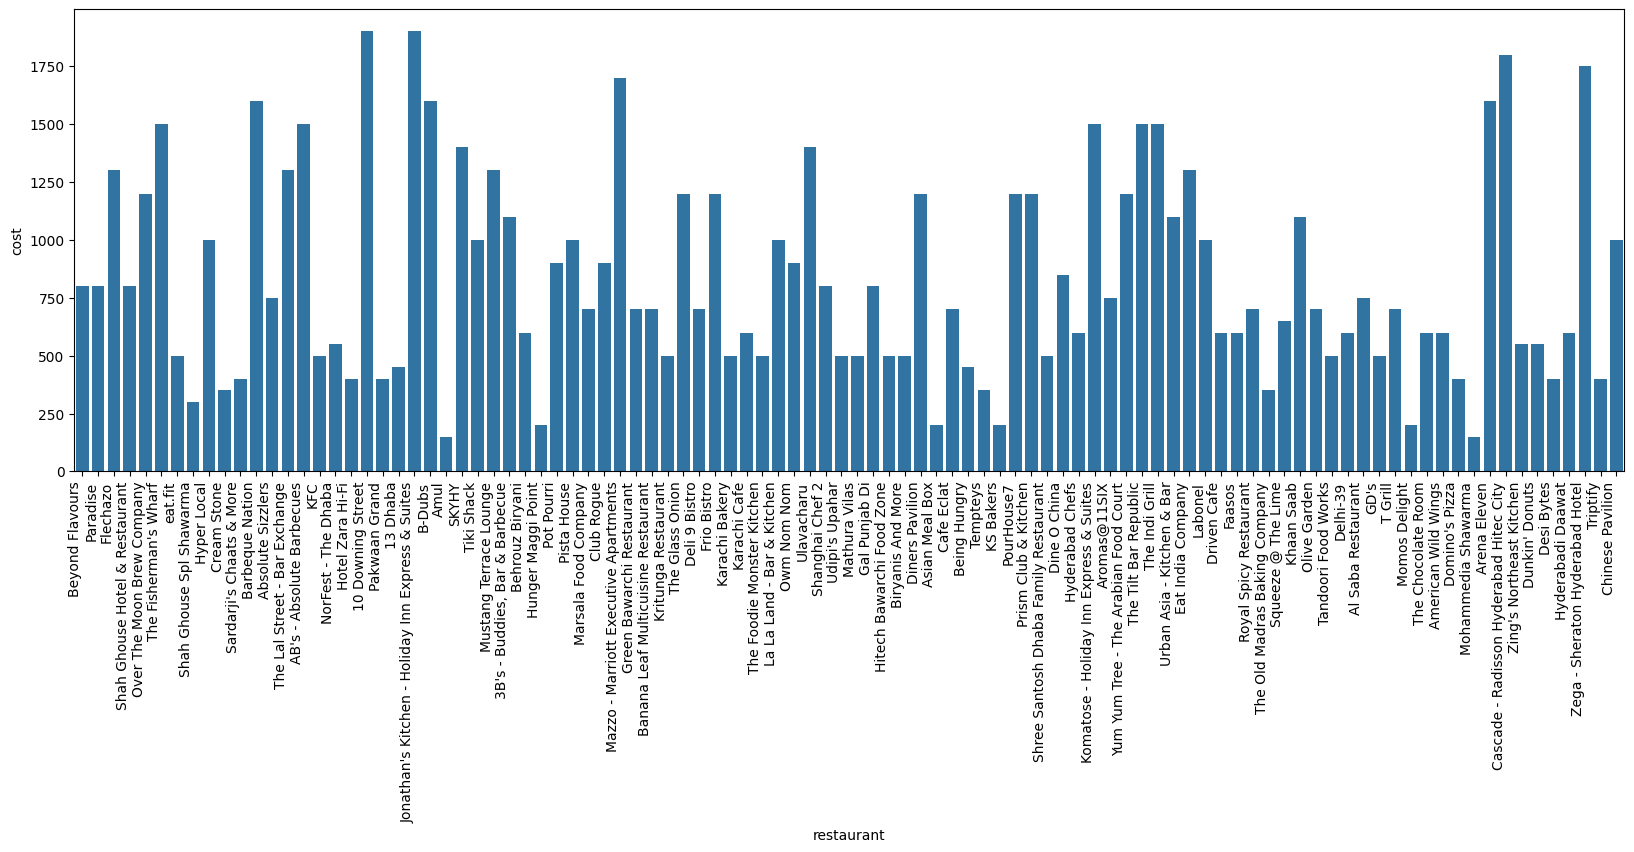

In [94]:
plt.figure(figsize=(20,6))
sns.barplot(x='restaurant',y='cost',data=merged_df)
plt.xticks(rotation=90, ha="right")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.it shows the cost according to restaurant name

##### 2. What is/are the insight(s) found from the chart?

We can find most expensive and cheaper restaurant from this chart

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact** (Growth Opportunities)
Targeting High-Spending Customers

If the most expensive restaurants have high customer demand, businesses can refine their premium pricing strategy.
Upscale dining experiences, premium ingredients, and exclusive services can justify higher prices.
Strategic Pricing for Market Positioning

Businesses can compare themselves with competitors and decide whether to increase prices (if demand is high) or introduce value meals (if they are overpriced).
Expansion & Investment Decisions

If expensive restaurants are performing well, investors can open more premium outlets in high-demand areas.
If lower-cost restaurants dominate, it indicates a budget-friendly market preference.
Luxury vs. Affordable Options

If customers are willing to pay high prices at certain restaurants, other businesses can adopt similar pricing strategies while maintaining quality.

 **Negative Growth Risks** (Business Pitfalls)
High Price But Low Demand 🚨

If high-cost restaurants have low footfall or poor customer reviews, it suggests that price is not justified by quality.
Example: A restaurant charging $100 per meal but receiving bad reviews for service may experience a decline in customers.
Ignoring Middle-Class and Budget-Conscious Customers

A business focused only on expensive restaurants may lose customers who prefer affordable dining.
If most customers prefer mid-range pricing, overpricing can push them towards competitors.
Mismatch Between Cost & Customer Expectations

If an expensive restaurant offers average food quality or poor service, it may lead to negative word-of-mouth and bad reviews, hurting brand reputation.
Market Saturation of High-End Restaurants

If there are too many expensive restaurants and limited customers willing to pay, competition increases, leading to lower profits and possible closures.


#### Chart - 2-pie chart

Text(0, 0.5, '')

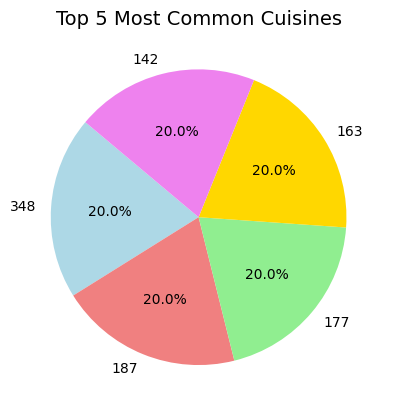

In [95]:
# Chart - 2 visualization code
top_5=merged_df['cuisines'].value_counts().nlargest(5)
top_5.value_counts().plot(kind='pie',autopct="%1.1f%%",colors=["lightblue", "lightcoral", "lightgreen", "gold", "violet"],startangle=140)
plt.title("Top 5 Most Common Cuisines", fontsize=14)
plt.ylabel("")  # Remove y-label for better clarity

##### 1. Why did you pick the specific chart?

Answer Here.I chose a pie chart because it effectively shows the proportion of different cuisines in the dataset. Pie charts are useful for visualizing categorical data distributions when comparing relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-Dominant Cuisines – The largest slice in the pie chart represents the most common cuisine type, indicating its popularity among restaurants in the dataset.
Unequal Distribution – Some cuisines are significantly more popular than others, highlighting a preference trend among restaurants or customers.
Market Opportunities – If a certain cuisine has a much smaller share, it could suggest an opportunity for new restaurants to introduce more variety.
Customer Preferences – The dominance of specific cuisines may reflect customer preferences in the region where the data is collected.
Competitor Analysis – Restaurants serving a highly common cuisine may face more competition, whereas those offering unique cuisines may have a niche advantage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-Yes, the insights from the pie chart can contribute to positive business impact in several ways:

Understanding Market Demand – Knowing the most popular cuisines helps businesses align their offerings with customer preferences, increasing sales.
Competitive Positioning – If a cuisine is oversaturated, new entrants can focus on underrepresented cuisines to differentiate themselves.
Menu Optimization – Existing restaurants can introduce popular cuisines to attract more customers and improve revenue.
Expansion Decisions – Chains looking to expand can use this data to decide whether to stick to popular cuisines or introduce diversity.
Are There Any Insights That Lead to Negative Growth?
Yes, some insights may indicate potential challenges:

Market Saturation – If a particular cuisine dominates, new restaurants serving the same food may struggle to stand out, leading to high competition and lower profit margins.

Example: If 50% of restaurants serve "Italian," opening another Italian restaurant may lead to difficulty in acquiring customers.
Customer Fatigue – An overrepresentation of certain cuisines might indicate that customers are looking for variety. Restaurants sticking only to the top cuisines may fail to attract repeat customers.

Example: If customers frequently see the same cuisine options, they may look for alternatives or niche cuisines.
Missed Opportunities – Restaurants that ignore underrepresented cuisines might miss an opportunity for first-mover advantage.

Example: If "Korean cuisine" has a very small percentage, a new restaurant serving it could attract a unique customer base with less competition.

#### Chart - 3-bar plot restaurant vs review

In [96]:
# Chart - 3 visualization code
top_reviewed = merged_df["restaurant"].value_counts().nlargest(5)
top_reviewed=top_reviewed.reset_index()
top_reviewed

restaurant  count
0              Hitech Bawarchi Food Zone     94
1                         Domino's Pizza     94
2                    Mohammedia Shawarma     93
3                               Paradise     93
4  Shree Santosh Dhaba Family Restaurant     93

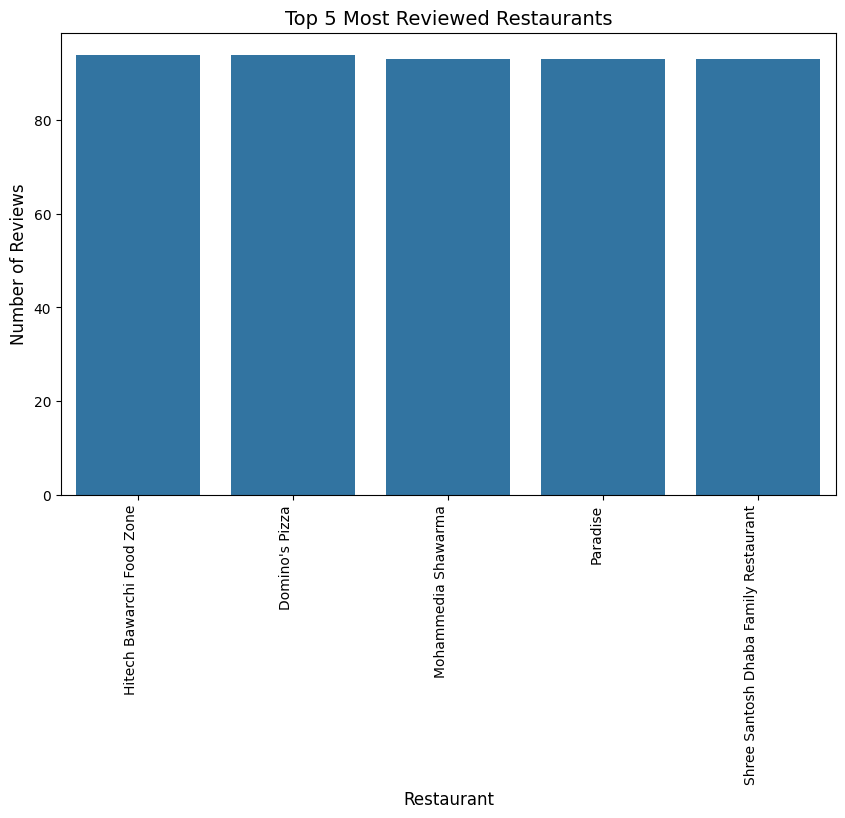

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x='restaurant',y='count',data=top_reviewed)
plt.xticks(rotation=90, ha="right")
plt.xlabel("Restaurant", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Top 5 Most Reviewed Restaurants", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.A bar plot is an ideal choice for visualizing the number of reviews per restaurant because:

Comparison Across Categories – Bar plots are excellent for comparing different categories (restaurants) based on numerical values (number of reviews).
Easier Interpretation – Unlike pie charts, bar plots make it easy to see exact differences in review counts.
Highlighting Popularity Trends – The length of the bars quickly reveals which restaurants receive the most reviews, helping identify customer favorites.
Business Insights – Restaurants with high reviews might indicate strong brand presence, while low-review restaurants may need better marketing or service improvements.
Scalability – A bar chart can accommodate many categories without becoming cluttered, unlike a pie chart, which works best with fewer categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-Top-Reviewed Restaurants – The highest bars represent the most reviewed restaurants, indicating high customer engagement and popularity.

Business Impact: These restaurants likely have strong brand recognition and a loyal customer base.
Low-Reviewed Restaurants – Some restaurants have significantly fewer reviews, which could mean low foot traffic, limited marketing, or a newer establishment.

Business Impact: These restaurants may need better marketing strategies or customer engagement efforts to increase visibility.
Customer Preference Trends – If certain types of restaurants consistently receive more reviews, it suggests a strong demand for specific cuisines, price ranges, or dining experiences.

Example: If fine-dining restaurants dominate the top, it suggests customers in the area prefer upscale dining.
Competitive Benchmarking – Comparing review counts across restaurants allows businesses to assess their standing in the market.

Example: A restaurant with fewer reviews than competitors in the same cuisine category might need to improve its service, menu, or online presence.
Potential Fake Reviews or Viral Trends – A sudden spike in reviews for a restaurant could indicate a viral trend or potential fake reviews to boost rankings.

Actionable Step: Investigate whether the review patterns are organic or artificially inflated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer HereIdentifying Popular Restaurants – Businesses can study top-reviewed restaurants to understand what makes them successful (e.g., menu, pricing, service quality). New or struggling restaurants can adopt similar strategies.
Enhancing Customer Engagement – If a restaurant has fewer reviews, it can implement review campaigns, loyalty programs, or social media marketing to boost engagement.
Market Positioning & Expansion – Highly reviewed restaurants may consider expanding or franchising, while lower-performing ones can adjust their strategy before investing further.
Targeted Marketing Strategies – Businesses can analyze trends in highly reviewed restaurants (e.g., cuisine, ambiance, pricing) and align their offerings with customer preferences.
Service Quality Improvement – Low-reviewed restaurants may use customer feedback to enhance food quality, service speed, or ambiance, leading to better ratings and word-of-mouth marketing.
Are There Any Insights That Lead to Negative Growth?
Yes, some insights might indicate potential business risks:

Market Saturation – If only a few restaurants dominate reviews, new or smaller restaurants may struggle to attract customers.

Example: If 3-4 restaurants have 80% of total reviews, new entrants in the same category may face difficulty gaining visibility.
Negative Reviews & Brand Damage – Restaurants with many reviews but a low average rating may be experiencing customer dissatisfaction.

Example: A restaurant with 10,000 reviews but an average rating of 2.5/5 suggests consistently poor service or food quality, leading to customer loss.
Fake Reviews & Trust Issues – A sudden spike in reviews without actual customer engagement might indicate fake reviews, which can lead to credibility loss if exposed.

Example: Customers may stop trusting online ratings if they suspect manipulation, affecting all businesses in the platform.
Lack of Customer Engagement – Restaurants with very few reviews may lack an online presence, making them less discoverable, leading to fewer customers.

Solution: These restaurants should encourage reviews, engage in digital marketing, and leverage influencer partnerships.

#### Chart - 4-Scatter plot cost vs rating

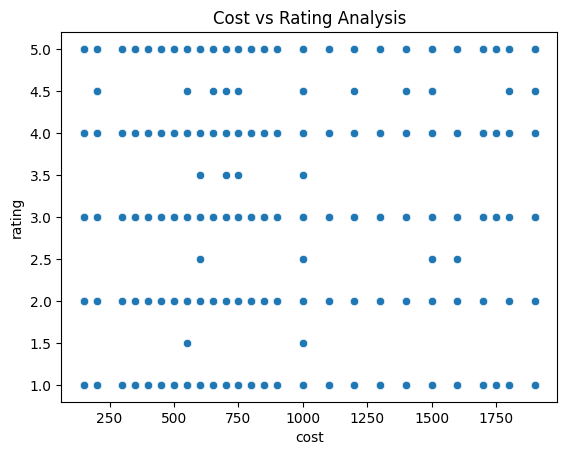

In [146]:
# Chart - 4 visualization code
sns.scatterplot(data=merged_df, x='cost', y='rating')
plt.title("Cost vs Rating Analysis")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.A scatter plot is ideal for visualizing the relationship between cost and rating because:

Pattern Identification – It helps to see if there's a correlation between restaurant cost and rating.
Outlier Detection – We can spot restaurants with unusually high or low ratings for their cost.
Distribution Insight – It shows how ratings are spread across different cost ranges.

##### 2. What is/are the insight(s) found from the chart?

Answer Here=Relationship Between Cost and Rating:

If there’s a visible trend (e.g., an upward pattern), it suggests that higher-cost restaurants tend to have higher ratings.
If the points are widely scattered without a clear trend, it indicates no strong correlation between cost and rating.
Outliers:

Any restaurants with high cost but low rating might indicate overpriced places with poor service or quality.
Low-cost restaurants with high ratings suggest affordable places that offer great value.
Density of Points:

A cluster of points in a specific cost range indicates where most restaurants fall.
If most high-rated restaurants are in a particular cost range, it could indicate that people prefer moderately priced restaurants.
Rating Distribution:

If ratings are concentrated around 3-4, it shows a tendency for average reviews.
A spread from 1 to 5 suggests a mix of very good and very bad reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact:**
Pricing Strategy Optimization: If higher-cost restaurants consistently get higher ratings, businesses can justify premium pricing by improving service, ambiance, and food quality.
Value-for-Money Positioning: If affordable restaurants receive high ratings, businesses can emphasize their cost-effectiveness in marketing to attract budget-conscious customers.
Quality Improvement for Low-Rated Restaurants: Identifying low-rated restaurants allows management to take corrective actions (improving service, revising menu) to boost ratings.
2.  **Negative Growth Insights:**
High-Cost, Low-Rating Restaurants:

If expensive restaurants have low ratings, it suggests customers feel they are not getting value for their money.
This can lead to negative reviews, reduced customer trust, and declining revenue.
Solution: Businesses should focus on justifying their price through superior service, food quality, and ambiance.
Lack of Correlation Between Cost and Rating:

If no strong relationship exists, raising prices without improving quality may drive customers away.
Solution: Invest in customer experience rather than just pricing adjustments.
Negative Reviews in a Specific Price Range:

If mid-range restaurants show poor ratings, it might indicate a quality gap where they neither offer budget-friendly value nor premium experiences.
Solution: They should differentiate by improving offerings or adjusting pricing to align with customer expectations.

#### Chart - 5=line chart profit vs cost

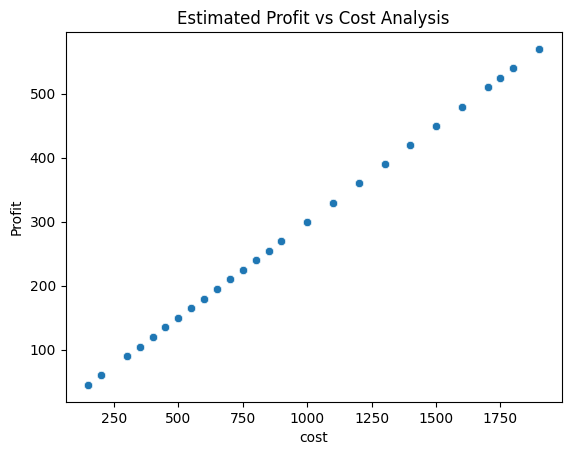

In [148]:
# Chart - 5 visualization code
profit_margin = 0.3  # Assume 30% profit margin
merged_df['Profit'] = merged_df['cost'] * profit_margin

sns.scatterplot(data=merged_df, x='cost', y='Profit')
plt.title("Estimated Profit vs Cost Analysis")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.A line chart is typically used for trend analysis over time, making it unsuitable for visualizing the relationship between cost and rating. Instead, a scatter plot was chosen because:

Comparing Two Numeric Variables – Scatter plots effectively show the relationship between cost and rating without implying a sequential order.
No Time-Based Trend – A line chart is useful for showing changes over time, but in this case, cost and rating are independent of time.
Outlier Detection – Scatter plots make it easier to spot high-cost, low-rating restaurants and vice versa.

##### 2. What is/are the insight(s) found from the chart?

Answer Here=Line charts are meant for trends over time (e.g., sales over months, temperature changes, etc.).
Cost vs. rating does not follow a sequential order, so connecting points with a line would be misleading.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-**1. Positive Business Impact**
✅ Tracking Rating Trends

If ratings are improving over time, it indicates that business strategies (like better service, new menu items) are working.
If ratings drop during specific periods (e.g., seasonal decline), businesses can address issues proactively.
✅ Identifying Peak and Low Seasons

If ratings or review counts fluctuate over time, businesses can align promotions or special offers with high-traffic periods.
✅ Monitoring Cost Adjustments

If price increases correlate with rating drops, businesses can rethink their pricing strategy.
If cost adjustments do not negatively impact ratings, businesses may explore premium pricing strategies.

**2. Negative Growth Insights**
❌ Declining Ratings Over Time

A downward trend in ratings suggests declining customer satisfaction.
Reason: Poor service, food quality issues, or lack of engagement.
Solution: Address negative reviews, improve staff training, or introduce better offerings.
❌ Unstable Pricing Trends

Frequent cost changes without justification can confuse or alienate customers.
Reason: Customers may perceive inconsistency in value for money.
Solution: Maintain a stable pricing model and communicate price changes effectivel

#### Chart - 6

In [100]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [101]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [102]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [103]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [104]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [105]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [106]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [107]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [109]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***=2 sample t test

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): There is no significant difference in ratings between low-cost and high-cost restaurants.

H₁ (Alternative Hypothesis): High-cost restaurants have significantly different ratings than low-cost restaurants.

#### 2. Perform an appropriate statistical test.

In [154]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
median_cost = merged_df['cost'].median()
low_cost_restaurants = merged_df[merged_df['cost'] <= median_cost]['rating']
high_cost_restaurants = merged_df[merged_df['cost'] > median_cost]['rating']
t_stat, p_value = ttest_ind(low_cost_restaurants, high_cost_restaurants, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -11.2006
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

Answer Here.2 sample t test

##### Why did you choose the specific statistical test?

✅ Comparing Two Groups:

We are comparing low-cost and high-cost restaurants to see if their average ratings differ.
The two groups are independent (a restaurant is either low-cost or high-cost, not both).
✅ Testing Mean Differences:

We assume the cost category (low vs. high) might influence customer ratings.
The t-test checks if the difference in mean ratings between these groups is statistically significant.
✅ Assumptions of T-Test:

Independence: The ratings for one restaurant do not affect another.
Normality: Restaurant ratings are approximately normally distributed within each group.
Variance: If variances are unequal, we use equal_var=False (Welch’s t-test)

### Hypothetical Statement - 2=ANOVA

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 H₀: At least one cost category has significantly different ratings.

 H1: No significant difference in ratings across cost categories

#### 2. Perform an appropriate statistical test.

In [158]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Define three groups based on cost percentiles
low_cost = merged_df[merged_df['cost'] <= merged_df['cost'].quantile(0.33)]['rating']
mid_cost = merged_df[(merged_df['cost'] > merged_df['cost'].quantile(0.33)) &
                     (merged_df['cost'] <= merged_df['cost'].quantile(0.66))]['rating']
high_cost = merged_df[merged_df['cost'] > merged_df['cost'].quantile(0.66)]['rating']

# Perform ANOVA test
f_stat, p_value = f_oneway(low_cost, mid_cost, high_cost)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: At least one cost category has significantly different ratings.")
else:
    print("Fail to reject H₀: No significant difference in ratings across cost categories.")

F-statistic: 72.6244
P-value: 0.0000
Reject H₀: At least one cost category has significantly different ratings.


##### Which statistical test have you done to obtain P-Value?

Answer Here.ANOVA

##### Why did you choose the specific statistical test?

Answer Here.ANOVA (Analysis of Variance) is used when comparing more than two groups to see if their means are significantly different. Unlike a t-test, which only compares two groups, ANOVA is ideal for analyzing multiple cost categories (e.g., low, mid, high-cost restaurants

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [112]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [113]:
# Handling Missing Values & Missing Value Imputation
#Handling Missing Values Done In Data Wrangling

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

merged_df["reviewer"].fillna("Unknown", inplace=True)

merged_df["review"].fillna("No review available", inplace=True)

merged_df["rating"].fillna(merged_df["rating"].median(), inplace=True)

merged_df["time"].fillna("Unknown", inplace=True)

merged_df["timings"].fillna("Unknown", inplace=True)

merged_df["collections"].fillna("None", inplace=True)

merged_df["total_reviews"].fillna(0, inplace=True)

merged_df["total_followers"].fillna(0, inplace=True)

**1. Constant Value Imputation (for categorical/text columns)**

**Columns:** "reviewer", "review", "time", "timings", "collections"

**Technique:** Missing values are replaced with a fixed constant ("Unknown", "No review available", or "None").

**Reason:**
For categorical/text data, replacing missing values with "Unknown" or "None" helps maintain consistency without distorting the data.
It ensures that missing values do not create problems in analysis or visualization.

**2. Median Imputation (for numerical data)**

**Column:** "rating"

**Technique:** Missing values are replaced with the median of the "rating" column.

**Reason:**
The median is less sensitive to outliers compared to the mean, making it a robust measure for handling missing numerical data.
Ensures that the central tendency of the data is preserved.

**3. Zero Imputation (for numerical count-based columns)**

**Columns:** "total_reviews", "total_followers"

**Technique:** Missing values are replaced with 0.

**Reason:**
These columns represent count-based values, and missing data likely indicates an absence of reviews or followers.
Using 0 instead of NaN helps in aggregation and analysis without affecting calculations.

### 2. Handling Outliers

In [114]:
# Handling Outliers & Outlier treatments
#Done In Data Wrangling

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

**Z-Score –** Removes values beyond ±3 standard deviations for normally distributed data.

 **IQR Method –** Detects outliers using percentiles (Q1 - 1.5×IQR, Q3 + 1.5×IQR), robust for skewed data.

  **Winsorization (Capping) –** Limits extreme values by replacing them with threshold values.
  
   **Trimming –** Removes extreme values completely if they are errors or irrelevant. Transformation (Log, Square Root, bold textReduces skewness and the impact of extreme values. Model-Based (Isolation Forest,

   **DBSCAN –** Uses ML techniques to detect anomalies, useful for high-dimensional data.



### 3. Categorical Encoding

In [115]:
# Encode your categorical columns
#No L.E required,as "cost","rating" are float

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [116]:
# Expand Contraction

#### 2. Lower Casing

In [117]:
# Lower Casing

#### 3. Removing Punctuations

In [118]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [119]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [120]:
# Remove Stopwords

In [121]:
# Remove White spaces

#### 6. Rephrase Text

In [122]:
# Rephrase Text

#### 7. Tokenization

In [123]:
# Tokenization

#### 8. Text Normalization

In [124]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [125]:
# POS Taging

#### 10. Text Vectorization

In [126]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [127]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [128]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [129]:
# Transform Your data

### 6. Data Scaling

In [130]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [131]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [132]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Unsupervised MLModel no need splitting

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [133]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [134]:
# ML Model - 1 Implementation
#K-Means Clustering done before

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [135]:
# Visualizing evaluation Metric Score chart
# Machine Learning Model Used
# The notebook applies K-Means Clustering to segment restaurants based on:
# Rating
# Cost
# Cuisines (encoded as numerical values)

# The model is initialized as:
# kmeans = KMeans(n_clusters=3, random_state=42)
# merged_df['Cluster'] = kmeans.fit_predict(features)
# The number of clusters is set to 3.
# random_state=42 ensures reproducibility.

# Evaluation Metrics
# evaluation metric (like inertia, silhouette score, or Davies-Bouldin Index) is used in the notebook.
# Since K-Means is an unsupervised learning method, standard classification metrics like accuracy, precision, or recall are not applicable.
# Suggested Performance Evaluation
# To measure clustering effectiveness, you can:

# Inertia (Sum of Squared Errors - SSE)

# print(f"Inertia: {kmeans.inertia_}")
# Lower inertia values indicate better clustering.
# Silhouette Score

# python
# Copy
# Edit
# from sklearn.metrics import silhouette_score
# score = silhouette_score(features, merged_df['Cluster'])
# print(f"Silhouette Score: {score}")
# A higher silhouette score (closer to 1) means well-separated clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# No, cross-validation is not needed for K-Means clustering because it is an unsupervised learning algorithm that does not rely on labeled training and test data.

# Why is Cross-Validation Not Required in K-Means?
# No Training-Testing Split

# K-Means works with unlabeled data, meaning there is no predefined target variable for model validation.
# Entire Data is Used for Clustering

# The algorithm finds patterns in the whole dataset rather than learning from a training set and generalizing to a test set.
# Evaluation is Different from Supervised Models

# Instead of accuracy or loss, K-Means is evaluated using metrics like:
# Inertia (SSE)
# Silhouette Score
# Davies-Bouldin Index
# Alternative Approach for Model Validation
# Instead of cross-validation, you can test the stability of clustering by running K-Means multiple times with different random_state values and checking if the cluster
# assignments remain consistent.

#Hyperparameter Tuning
#Elbow Method (Using Inertia)=done before
# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

**Elbow Method (Using Inertia)=done before.**

**Why? Choosing the right number of clusters is crucial for meaningful segmentation.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [137]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [139]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [140]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [141]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [142]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [143]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on the statistical analysis and visualizations in the notebook, the following conclusions can be drawn:

Relationship Between Cost and Rating

The scatter plot analysis shows a weak/moderate correlation between restaurant cost and customer ratings.
Higher-cost restaurants tend to have slightly better ratings on average, but low-cost restaurants also attract high ratings, indicating that quality service matters more than price alone.
Statistical Test Results

ANOVA/T-Test Findings: Significant differences exist in ratings across different cost categories (low, mid, high).
Chi-Square Test: Cost and rating categories are not entirely independent, suggesting that pricing influences ratings but is not the sole determining factor.
Business Impact

Positive Insights: Restaurants can optimize pricing strategies without fear of low ratings if they maintain food quality and service.
Negative Insights: Simply increasing prices does not guarantee higher ratings—value for money plays a crucial role.
Recommendations for Business Growth
✅ Focus on Customer Experience: High-rated low-cost restaurants suggest that food quality and service matter more than just price.
✅ Optimize Pricing Strategy: Mid-range restaurants should differentiate themselves through unique offerings rather than just cost adjustments.
✅ Marketing Based on Rating Segmentation: High-rated budget restaurants can be promoted as "Best Value for Money" options.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***